In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [57]:
bsh = pd.read_csv('../data/snd-bs-q-20-12.csv', sep='\t', encoding="latin-1", index_col=0).T
ist = pd.read_csv('../data/snd-is-q-20-12.csv', sep='\t', encoding="latin-1", index_col=0).T
cfs = pd.read_csv('../data/snd-cf-q-20-12.csv', sep='\t', encoding="latin-1", index_col=0).T
# cols = df.iloc[0]
# df[0:][5:]
# df.dropna(inplace = True)  
col = pd.to_datetime(bsh.index, format='%d.%m.%Y', dayfirst=True)
bsh['date'] = col
bsh['year'] = col.year
bsh[ 'quarter'] = col.quarter
bsh[ 'month'] = col.month
# bsh.columns[:]
col = pd.to_datetime(ist.index, format='%d.%m.%Y', dayfirst=True)
ist['date'] = col

col = pd.to_datetime(cfs.index, format='%d.%m.%Y', dayfirst=True)
cfs['date'] = col
# ist['year'] = col.year
# ist[ 'quarter'] = col.quarter
# ist[ 'month'] = col.month
# ist.columns[:]
# ist[['Revenues', 'Cost of Goods Sold', 'Selling General & Admin Expenses', 'Interest Expense']][0:10]

merged = pd.merge(bsh, ist, on='date', how='inner', validate='1:m')
merged = pd.merge(merged, cfs, on='date', how='inner', validate='1:m')
# merged.columns[:]



merged.dtypes[['Change In Accounts Receivable', 'Cost of Goods Sold', 'Selling General & Admin Expenses', 'Interest Expense']]


Change In Accounts Receivable       object
Cost of Goods Sold                  object
Selling General & Admin Expenses    object
Interest Expense                    object
dtype: object

In [56]:
import re

def normalize_string(s):
    """
    Normalize a string by converting to lowercase, trimming, replacing non-alphanumeric characters with underscores,
    replacing spaces with underscores, and collapsing multiple consecutive underscores into a single underscore.
    
    :param s: The input string
    :return: The normalized string
    """
    s = s.lower()  # convert to lowercase
    s = s.strip()  # trim from both sides
    s = re.sub(r'[^a-zA-Z0-9\s%&]', '_', s)  # replace non-alphanumeric characters with underscores
    s = re.sub(r'\s', '_', s)  # replace spaces with underscores
    s = s.replace("&", "_and_") # replace '&' with '_and_'
    # Move '%' to the end of the string and prepend an underscore
    if '%' in s:
        s = s.replace('%', '')  # remove '%' from the string                
        s = s + '_%'  # append '_%' to the end of the string    
                
    s = s.strip('_')  # trim underscores from the start and end of the string
    s = re.sub(r'_+', '_', s)  # collapse multiple consecutive underscores into a single underscore
    return s

In [58]:
# merged[['date', 'Revenues', 'EBITDA', 'Price Close']][0:10]
# merged['Revenues'] = pd.to_numeric(merged['Revenues'], errors='coerce')



row = []
cols = {}
for idx, col in enumerate(merged.columns): 
  row.append([col, normalize_string(col)])
  cols.update({col: normalize_string(col)})
  # print(col, normalize_string(col))

ndf = merged.rename(columns=cols, inplace=False)
# dict.fromkeys(row[0:], row[1:])
# print (merged.columns)
ndf[1:10]
# Export the column names to a CSV file
pd.DataFrame(row).to_csv('../data/column_names.csv', columns=[0, 1], index=False)



In [59]:
# Change all columns to the appropriate types
# merged = pd.to_numeric(merged, errors='coerce')
# ndf.columns[:]

cols_dupl = [col for col in ndf.columns if '_x' in col]
cols_dupl

Index(['cash_and_equivalents', 'total_cash_and_short_term_investments',
       'accounts_receivable', 'other_receivables', 'total_receivables',
       'inventory', 'prepaid_expenses', 'restricted_cash',
       'other_current_assets', 'total_current_assets',
       ...
       'net_change_in_cash', 'supplementary_data', 'free_cash_flow',
       'change_yoy_%', 'free_cash_flow_margins_%',
       'cash_and_cash_equivalents_beginning_of_period',
       'cash_and_cash_equivalents_end_of_period', 'cash_interest_paid',
       'cash_taxes_paid', 'cash_flow_per_share'],
      dtype='object', length=148)

row: 0, col: 1, ['10,36' '8,49' '10,93' '29,45' '25,06' '29,79' '39,33' '43,04' '42,63'
 '54,45' '63,15' '52,25' '51,78' '67,94' '65,69' '47,67' '47,49' '26,11'
 '23,41' '25,34' '27,45' '29,64' '34,48' '35,08' '41,61' '68,71' '71,59'
 '73,83' '82,35' '74,78' '76,9' '61,95' '83,05' '73,8'], ['0,38' '-2,35' '-0,1' '12,44' '0,97' '2,62' '7,05' '10,88' '0,98' '10,02'
 '12,13' '-4,43' '4,03' '14,28' '10,93' '2,39' '-0,08' '4,64' '36,28'
 '-2,88' '-3,91' '-27,27' '-7,26' '-12,23' '-5,92' '-0,09' '2,68' '2,63'
 '-3,6' '6,31' '6,73' '-4,79' '-0,22' '-0,43']


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['0,38', '-2,35', '-0,1', '12,44', '0,97', '2,62', '7,05', '10,88',
       '0,98', '10,02', '12,13', '-4,43', '4,03', '14,28', '10,93',
       '2,39', '-0,08', '4,64', '36,28', '-2,88', '-3,91', '-27,27',
       '-7,26', '-12,23', '-5,92', '-0,09', '2,68', '2,63', '-3,6',
       '6,31', '6,73', '-4,79', '-0,22', '-0,43'], dtype=object)

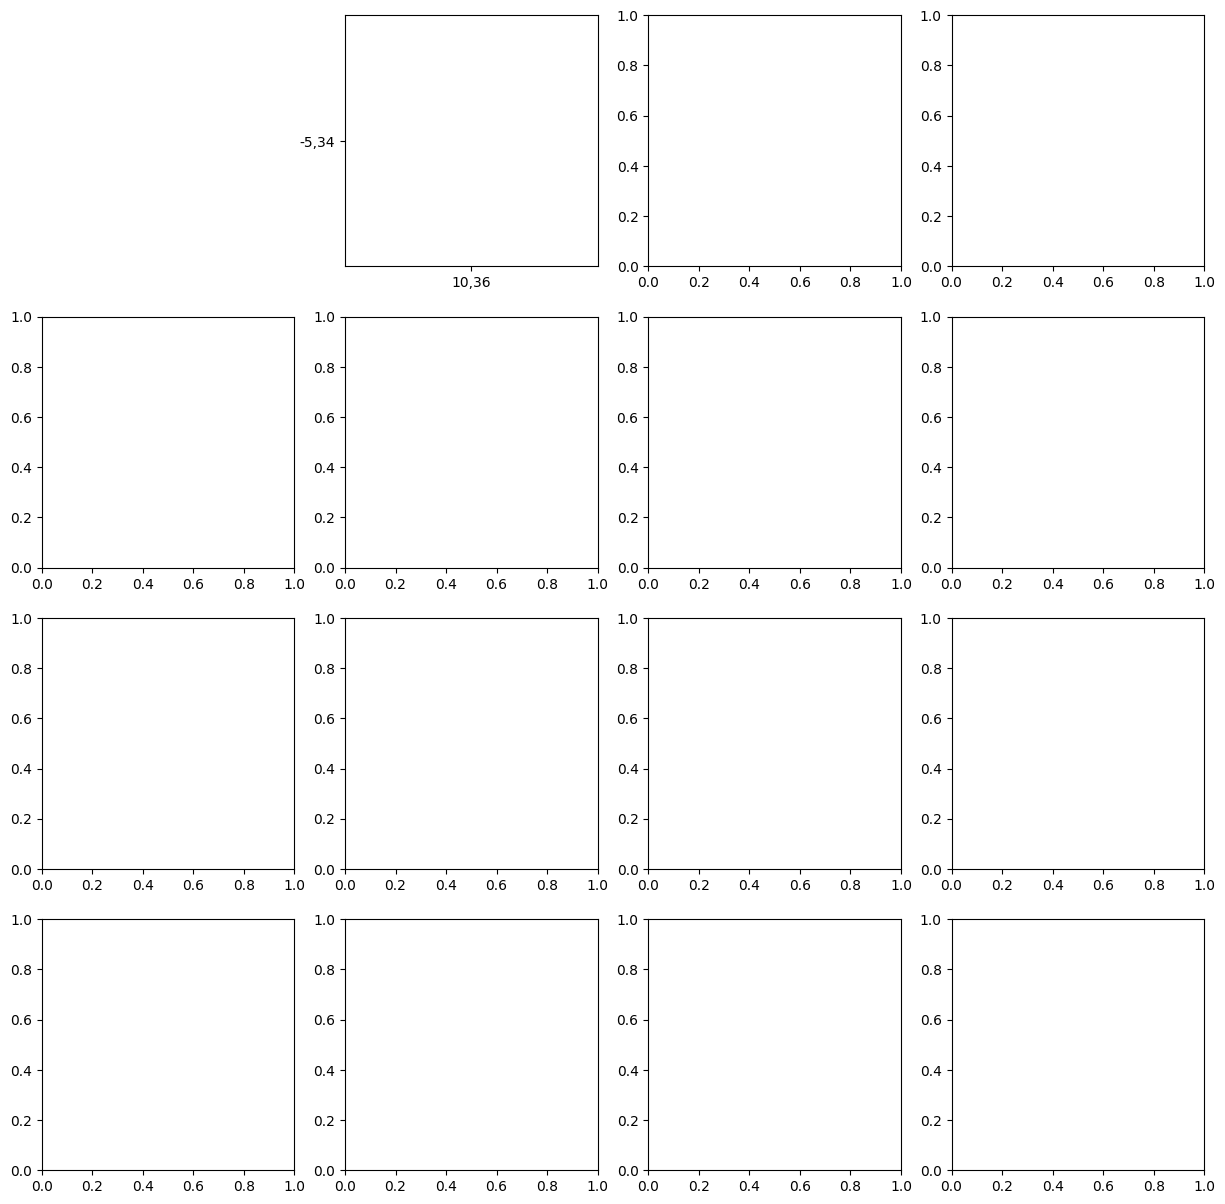

In [ ]:
# vykresleni korelacniho diagramu pro dvojici vybranych atributu
# první sloupec: x-ové souřadnice
# druhý sloupec: y-ové souřadnice
# 
# plt.title("Classes")
# vykresleni mrizky korelacnich diagramu
fig, axes = plt.subplots(nrows=4, ncols=4)

# rozmery grafu
fig.set_figheight(15)
fig.set_figwidth(15)
ist[['Revenues', 'Cost of Goods Sold']]

feature_names = ['Revenues', 'Cost of Goods Sold', 'Selling General & Admin Expenses', 'Interest Expense']
target = ist['Net Income'].to_numpy()
data = ist[feature_names].to_numpy()

# vyplneni mrizky
for row in range(4):
    for column in range(4):
        ax = axes[row][column]
        if row == column:
            # na diagonale jsou prazdna mista
            fig.delaxes(ax)
            continue
        # pridat korelacni diagram do mrizky
        print(f"row: {row}, col: {column}, {data[:, row]}, {target}")
        scatter = ax.scatter(data[:, row], data[:, column], c=target)
        # popisky os
        ax.set(xlabel=feature_names[row], ylabel=feature_names[column])
 
 
# zbavit se prazdneho mista okolo bunek mrizky
plt.tight_layout()

# ulozeni diagramu do souboru
plt.savefig("52.png")
 
# zobrazeni diagramu
plt.show()


In [ ]:


# vyplneni mrizky
for row in range(4):
    for column in range(4):
        ax = axes[row][column]
        if row == column:
            # na diagonale jsou prazdna mista
            fig.delaxes(ax)
            continue
        # pridat korelacni diagram do mrizky
        scatter = ax.scatter(data[:, row], data[:, column], c=target)
        # popisky os
        ax.set(xlabel=feature_names[row], ylabel=feature_names[column])
 
 
# zbavit se prazdneho mista okolo bunek mrizky
plt.tight_layout()

# ulozeni diagramu do souboru
plt.savefig("52.png")
 
# zobrazeni diagramu
plt.show()